In [1]:
!pip install pandas requests spacy seaborn

You should consider upgrading via the '/Users/lopez/Projects/data_extractors/venv3.8/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import seaborn as sns
import spacy
import requests
import json
import hashlib
import matplotlib.pyplot as plt

In [3]:
data = {
    'user': "Ezloplop",
    'group_text': "BehSci",
    'group': "Jk8bYJdN",
    'api_key': "my_api_key"
}

url_search = "https://api.hypothes.is/api/search"
url_ = "https://hypothes.is/groups/Jk8bYJdN/behsci"

In [5]:
res = requests.get(url=url_search, params={'group':'Jk8bYJdN', 'limit': 200}, headers={'Authorization': f"Bearer {data['api_key']}"})

In [6]:
json = res.json()
pd.DataFrame(json['rows'])

,id,created,updated,user,uri,text,tags,group,permissions,target,document,links,user_info,flagged,hidden
0,jgScFqE6EeyAat-DIa0H4w,2022-03-11T12:55:40.187204+00:00,2022-03-11T12:57:20.307769+00:00,acct:chaeyeonlim@hypothes.is,https://www.bmj.com/content/376/bmj.o631,"Karan, A. (2022). We cannot afford to repeat t...","[is:article, lang:en, COVID-19, pandemic, beha...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.bmj.com/content/376/b...,{'title': ['We cannot afford to repeat these f...,{'html': 'https://hypothes.is/a/jgScFqE6EeyAat...,{'display_name': 'CYL'},False,False
1,l9orPqE6Eey8f7cfgQLHYA,2022-03-11T12:55:56.813003+00:00,2022-03-11T12:55:56.813003+00:00,acct:chaeyeonlim@hypothes.is,https://www.bmj.com/content/376/bmj.o631,2022-03-10,[has:date],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.bmj.com/content/376/b...,{'title': ['We cannot afford to repeat these f...,{'html': 'https://hypothes.is/a/l9orPqE6Eey8f7...,{'display_name': 'CYL'},False,False
2,gs3E4KE5Eey1v2-erx0Zxg,2022-03-11T12:48:11.996874+00:00,2022-03-11T12:48:11.996874+00:00,acct:chaeyeonlim@hypothes.is,https://www.bmj.com/content/376/bmj.o631,,[ann:doi],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.bmj.com/content/376/b...,{'title': ['We cannot afford to repeat these f...,{'html': 'https://hypothes.is/a/gs3E4KE5Eey1v2...,{'display_name': 'CYL'},False,False
3,e7IvKqE5Eeyxk9NbiXGNsQ,2022-03-11T12:47:59.958092+00:00,2022-03-11T12:47:59.958092+00:00,acct:chaeyeonlim@hypothes.is,https://www.bmj.com/content/376/bmj.o631,,[ann:summary],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.bmj.com/content/376/b...,{'title': ['We cannot afford to repeat these f...,{'html': 'https://hypothes.is/a/e7IvKqE5Eeyxk9...,{'display_name': 'CYL'},False,False
4,bHe1_KE5EeyrcPO-kwsLdg,2022-03-11T12:47:34.378711+00:00,2022-03-11T12:47:34.378711+00:00,acct:chaeyeonlim@hypothes.is,https://www.bmj.com/content/376/bmj.o631,,[ann:title],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.bmj.com/content/376/b...,{'title': ['We cannot afford to repeat these f...,{'html': 'https://hypothes.is/a/bHe1_KE5EeyrcP...,{'display_name': 'CYL'},False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,I7KSppYcEeyuiZOYW8HqTA,2022-02-25T09:20:14.332702+00:00,2022-02-25T09:20:14.332702+00:00,acct:zoe_ikeotuonye@hypothes.is,https://www.sanofi.com/en/media-room/press-rel...,,[ann:summary],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.sanofi.com/en/media-r...,"{'title': ['Sanofi: Press Releases, Wednesday,...",{'html': 'https://hypothes.is/a/I7KSppYcEeyuiZ...,{'display_name': None},False,False
196,GbxZ0JYcEeyvGtftbaa5kg,2022-02-25T09:19:57.618649+00:00,2022-02-25T09:19:57.618649+00:00,acct:zoe_ikeotuonye@hypothes.is,https://www.sanofi.com/en/media-room/press-rel...,,[ann:title],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.sanofi.com/en/media-r...,"{'title': ['Sanofi: Press Releases, Wednesday,...",{'html': 'https://hypothes.is/a/GbxZ0JYcEeyvGt...,{'display_name': None},False,False
197,FMY86JYcEeyrlv_8cfV4ag,2022-02-25T09:19:49.312215+00:00,2022-02-25T09:19:49.312215+00:00,acct:zoe_ikeotuonye@hypothes.is,https://www.sanofi.com/en/media-room/press-rel...,2022-02-23,[has:date],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.sanofi.com/en/media-r...,"{'title': ['Sanofi: Press Releases, Wednesday,...",{'html': 'https://hypothes.is/a/FMY86JYcEeyrlv...,{'display_name': None},False,False
198,DtU_MpYcEeyvGE9iXxhETg,2022-02-25T09:19:39.307971+00:00,2022-02-25T09:19:39.307971+00:00,acct:zoe_ikeotuonye@hypothes.is,https://www.sanofi.com/en/media-room/press-rel...,https://twitter.com/carlzimmer/status/14964763...,[has:context],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'sourc

In [7]:
users = requests.get(url=f"https://api.hypothes.is/api/groups/{data['group']}/members")

In [8]:
users.json()[1]

{'authority': 'hypothes.is',
 'userid': 'acct:gailelhalaby@hypothes.is',
 'username': 'gailelhalaby',
 'display_name': None}

In [10]:
data_per_user = []
for user in users.json():
    print(user)
    user_id = user['userid']
    user_batch = []
    for i in range(0, 5000, 200):
        res = requests.get(url=url_search,
                           params={'group':'Jk8bYJdN', 'user':f'{user_id}', 'limit': 200, 'offset':i},
                           headers={'Authorization': f"Bearer {data['api_key']}"})
        user_batch.append(res.json())
    data_per_user.append(user_batch)

{'authority': 'hypothes.is', 'userid': 'acct:amyhcurtis@hypothes.is', 'username': 'amyhcurtis', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:gailelhalaby@hypothes.is', 'username': 'gailelhalaby', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:stefanherzog@hypothes.is', 'username': 'stefanherzog', 'display_name': 'Stefan Herzog'}
{'authority': 'hypothes.is', 'userid': 'acct:Hahn@hypothes.is', 'username': 'Hahn', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:Marlene_Wulf@hypothes.is', 'username': 'Marlene_Wulf', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:edampf@hypothes.is', 'username': 'edampf', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:lewan@hypothes.is', 'username': 'lewan', 'display_name': None}
{'authority': 'hypothes.is', 'userid': 'acct:SIYANYE@hypothes.is', 'username': 'SIYANYE', 'display_name': 'JessieYe'}
{'authority': 'hypothes.is', 'userid': 'acct:MuhsinYesilada@hyp

In [25]:
total_anns = []
for batch in data_per_user:
    for elem in batch:
        total_anns += elem['rows']

In [33]:
total_anns_df = pd.DataFrame(total_anns)
total_anns_df.to_json('hypothesis_v1__12-03-22.jsonl', orient='records', lines=True)

### Data Exploration

In [3]:
# Utils

def generate_id(string: str):
    return hashlib.sha1(string.encode("utf-8")).hexdigest()

----

In [4]:
_total_anns_df = pd.read_json('hypothesis_v1__12-03-22.jsonl', orient='records', lines=True)
total_anns_df = _total_anns_df.copy()

In [5]:
total_anns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42473 entries, 0 to 42472
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           42473 non-null  object
 1   created      42473 non-null  object
 2   updated      42473 non-null  object
 3   user         42473 non-null  object
 4   uri          42473 non-null  object
 5   text         42473 non-null  object
 6   tags         42473 non-null  object
 7   group        42473 non-null  object
 8   permissions  42473 non-null  object
 9   target       42473 non-null  object
 10  document     42473 non-null  object
 11  links        42473 non-null  object
 12  user_info    42473 non-null  object
 13  flagged      42473 non-null  bool  
 14  hidden       42473 non-null  bool  
dtypes: bool(2), object(13)
memory usage: 4.3+ MB


In [6]:
total_anns_df.head(20)

,id,created,updated,user,uri,text,tags,group,permissions,target,document,links,user_info,flagged,hidden
0,rnlcIho0EeuKgFfKPBbajQ,2020-10-29T22:18:33.169969+00:00,2020-10-29T22:18:33.169969+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=QapwrR9C3Z4,https://twitter.com/i/web/status/1306171100544...,[has:context],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=Q...,{'title': ['The impact of Covid-19 on media – ...,{'html': 'https://hypothes.is/a/rnlcIho0EeuKgF...,{'display_name': None},False,False
1,qHdm3ho0EeuTJufnuQnIqQ,2020-10-29T22:18:23.010549+00:00,2020-10-29T22:18:23.010549+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=QapwrR9C3Z4,2020-09-16,[has:date],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=Q...,{'title': ['The impact of Covid-19 on media – ...,{'html': 'https://hypothes.is/a/qHdm3ho0EeuTJu...,{'display_name': None},False,False
2,oUZLeBo0EeuthtuX8fq6yQ,2020-10-29T22:18:11.003006+00:00,2020-10-29T22:18:11.003006+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=QapwrR9C3Z4,The impact of Covid-19 on media – rise of info...,"[is:youtube, is:webinar, disinformation, misin...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=Q...,{'title': ['The impact of Covid-19 on media – ...,{'html': 'https://hypothes.is/a/oUZLeBo0Eeutht...,{'display_name': None},False,False
3,gHTeKBo0EeubG0_nm_NNpQ,2020-10-29T22:17:15.887213+00:00,2020-10-29T22:17:15.887213+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=QapwrR9C3Z4,,[ann:summary],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=Q...,{'title': ['The impact of Covid-19 on media – ...,{'html': 'https://hypothes.is/a/gHTeKBo0EeubG0...,{'display_name': None},False,False
4,fAZg8Bo0Eeu39uviYF17AQ,2020-10-29T22:17:08.501454+00:00,2020-10-29T22:17:08.501454+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=QapwrR9C3Z4,,[ann:title],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=Q...,{'title': ['The impact of Covid-19 on media – ...,{'html': 'https://hypothes.is/a/fAZg8Bo0Eeu39u...,{'display_name': None},False,False
5,uAs1rhozEeuVV7-ike6oNw,2020-10-29T22:11:39.622491+00:00,2020-10-29T22:11:39.622491+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=wGWqBtDkOFs,"Online Research Tools and Techniques. (2020, ...","[is:webinar, is:youtube, online, research, eth...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=w...,{'title': ['Online Research Tools and Techniqu...,{'html': 'https://hypothes.is/a/uAs1rhozEeuVV7...,{'display_name': None},False,False
6,FaDHPhozEeuXjAsKbE0ErA,2020-10-29T22:07:07.184512+00:00,2020-10-29T22:07:07.184512+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=wGWqBtDkOFs,https://twitter.com/i/web/status/1305920211992...,[has:context],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=w...,{'title': ['Online Research Tools and Techniqu...,{'html': 'https://hypothes.is/a/FaDHPhozEeuXjA...,{'display_name': None},False,False
7,EFakYBozEeuw3TO-taovEg,2020-10-29T22:06:58.254626+00:00,2020-10-29T22:06:58.254626+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=wGWqBtDkOFs,2020-09-15,[has:date],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=w...,{'title': ['Online Research Tools and Techniqu...,{'html': 'https://hypothes.is/a/EFakYBozEeuw3T...,{'display_name': None},False,False
8,ChBWPBozEeuqI0dyN6mJpw,2020-10-29T22:06:47.797225+00:00,2020-10-29T22:06:47.797225+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=wGWqBtDkOFs,If COVID-19 is the 9/11 moment for global publ...,[ann:s

In [7]:
total_anns_df.query('text != ""')[['doc_id', 'text']]

KeyError: "['doc_id'] not in index"

In [ ]:
print(f"Unique documents: {len(total_anns_df.uri.unique())}")

In [ ]:
total_anns_df['doc_id'] = total_anns_df['uri'].apply(lambda doc: generate_id(doc))

In [8]:
all_tags = total_anns_df.tags.sum()

In [9]:
len(all_tags)

140210

In [10]:
from collections import Counter

In [11]:
unique_tags = Counter(all_tags)

In [12]:
def create_tag_columns(row):
    row['is:'] = []
    row['has:'] = []
    row['ann:'] = []
    row['lang:'] = []
    row['terms_tags'] = []
    for tag in row['tags']:
        #tags = tags.replace('[','').replace(']','').split(',')
        #for tag in tags:
        if 'is:' in tag:
            row['is:'].append(tag.split(':')[1])
        elif 'has:' in tag:
            row['has:'].append(tag.split(':')[1])
        elif 'ann:' in tag:
            row['ann:'].append(tag.split(':')[1])
        elif 'lang:' in tag:
            row['lang:'].append(tag.split(':')[1])
        else:
            row['terms_tags'].append(tag)
    return row

def create_type_columns(row):
    for col in ['is:', 'has:', 'ann:']:
        for val in row[col]:
            row[f"{col.replace(':','')}_{val}"] = True
    return row

In [13]:
#from ast import literal_eval
#total_anns_df['tags'] = total_anns_df['tags'].apply(lambda str_list: literal_eval(str_list) if type(str_list) == 'str' else str_list)

In [14]:
total_anns_df = total_anns_df.apply(lambda row: create_tag_columns(row), axis=1)

In [15]:
total_anns_df

,id,created,updated,user,uri,text,tags,group,permissions,target,document,links,user_info,flagged,hidden,is:,has:,ann:,lang:,terms_tags
0,rnlcIho0EeuKgFfKPBbajQ,2020-10-29T22:18:33.169969+00:00,2020-10-29T22:18:33.169969+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=QapwrR9C3Z4,https://twitter.com/i/web/status/1306171100544...,[has:context],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=Q...,{'title': ['The impact of Covid-19 on media – ...,{'html': 'https://hypothes.is/a/rnlcIho0EeuKgF...,{'display_name': None},False,False,[],[context],[],[],[]
1,qHdm3ho0EeuTJufnuQnIqQ,2020-10-29T22:18:23.010549+00:00,2020-10-29T22:18:23.010549+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=QapwrR9C3Z4,2020-09-16,[has:date],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=Q...,{'title': ['The impact of Covid-19 on media – ...,{'html': 'https://hypothes.is/a/qHdm3ho0EeuTJu...,{'display_name': None},False,False,[],[date],[],[],[]
2,oUZLeBo0EeuthtuX8fq6yQ,2020-10-29T22:18:11.003006+00:00,2020-10-29T22:18:11.003006+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=QapwrR9C3Z4,The impact of Covid-19 on media – rise of info...,"[is:youtube, is:webinar, disinformation, misin...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=Q...,{'title': ['The impact of Covid-19 on media – ...,{'html': 'https://hypothes.is/a/oUZLeBo0Eeutht...,{'display_name': None},False,False,"[youtube, webinar]",[],[],[en],"[disinformation, misinformation, online, techn..."
3,gHTeKBo0EeubG0_nm_NNpQ,2020-10-29T22:17:15.887213+00:00,2020-10-29T22:17:15.887213+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=QapwrR9C3Z4,,[ann:summary],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=Q...,{'title': ['The impact of Covid-19 on media – ...,{'html': 'https://hypothes.is/a/gHTeKBo0EeubG0...,{'display_name': None},False,False,[],[],[summary],[],[]
4,fAZg8Bo0Eeu39uviYF17AQ,2020-10-29T22:17:08.501454+00:00,2020-10-29T22:17:08.501454+00:00,acct:amyhcurtis@hypothes.is,https://www.youtube.com/watch?v=QapwrR9C3Z4,,[ann:title],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://www.youtube.com/watch?v=Q...,{'title': ['The impact of Covid-19 on media – ...,{'html': 'https://hypothes.is/a/fAZg8Bo0Eeu39u...,{'display_name': None},False,False,[],[],[title],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42468,IqqGzNZdEeu7qW8TVqQlWA,2021-06-26T09:01:46.663954+00:00,2021-06-26T09:01:46.663954+00:00,acct:lucyparfitt16@hypothes.is,https://poseidon01.ssrn.com/delivery.php?ID=05...,2021-03-31,[has:date],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://poseidon01.ssrn.com/deliv...,{'title': ['Microsoft Word - Parry et al.docx']},{'html': 'https://hypothes.is/a/IqqGzNZdEeu7qW...,{'display_name': None},False,False,[],[date],[],[],[]
42469,GzcHitZdEeu3utsN1zIlXA,2021-06-26T09:01:34.146545+00:00,2021-06-26T09:01:34.146545+00:00,acct:lucyparfitt16@hypothes.is,https://poseidon01.ssrn.com/delivery.php?ID=05...,"Parry, H. M., Tut, G., Faustini, S., Stephens,...","[is:preprint, lang:en, COVID-19, vaccine, immu...",Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://poseidon01.ssrn.com/deliv...,{'title': ['Microsoft Word - Parry et al.docx']},{'html': 'https://hypothes.is/a/GzcHitZdEeu3ut...,{'display_name': None},False,False,[preprint],[],[],[en],"[COVID-19, vaccine, immunity, variant, vaccina..."
42470,tkTclNZcEeu7dhcV5i6TGA,2021-06-26T08:58:44.804883+00:00,2021-06-26T08:58:44.804883+00:00,acct:lucyparfitt16@hypothes.is,https://poseidon01.ssrn.com/delivery.php?ID=05...,,[ann:summary],Jk8bYJdN,"{'read': ['group:__world__'], 'admin': ['acct:...",[{'source': 'https://poseidon01.ssrn.com

In [16]:
total_anns_df = total_anns_df.apply(lambda row: create_type_columns(row), axis=1)

In [17]:
total_anns_df

,ann:,ann_,ann_ summary,ann_ title,ann_DOI,ann_ID,ann_ISBN,ann_Summary,ann_abstract,ann_arXiv,...,links,permissions,tags,target,terms_tags,text,updated,uri,user,user_info
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/rnlcIho0EeuKgF...,"{'read': ['group:__world__'], 'admin': ['acct:...",[has:context],[{'source': 'https://www.youtube.com/watch?v=Q...,[],https://twitter.com/i/web/status/1306171100544...,2020-10-29T22:18:33.169969+00:00,https://www.youtube.com/watch?v=QapwrR9C3Z4,acct:amyhcurtis@hypothes.is,{'display_name': None}
1,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/qHdm3ho0EeuTJu...,"{'read': ['group:__world__'], 'admin': ['acct:...",[has:date],[{'source': 'https://www.youtube.com/watch?v=Q...,[],2020-09-16,2020-10-29T22:18:23.010549+00:00,https://www.youtube.com/watch?v=QapwrR9C3Z4,acct:amyhcurtis@hypothes.is,{'display_name': None}
2,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/oUZLeBo0Eeutht...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:youtube, is:webinar, disinformation, misin...",[{'source': 'https://www.youtube.com/watch?v=Q...,"[disinformation, misinformation, online, techn...",The impact of Covid-19 on media – rise of info...,2020-10-29T22:18:11.003006+00:00,https://www.youtube.com/watch?v=QapwrR9C3Z4,acct:amyhcurtis@hypothes.is,{'display_name': None}
3,[summary],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/gHTeKBo0EeubG0...,"{'read': ['group:__world__'], 'admin': ['acct:...",[ann:summary],[{'source': 'https://www.youtube.com/watch?v=Q...,[],,2020-10-29T22:17:15.887213+00:00,https://www.youtube.com/watch?v=QapwrR9C3Z4,acct:amyhcurtis@hypothes.is,{'display_name': None}
4,[title],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/fAZg8Bo0Eeu39u...,"{'read': ['group:__world__'], 'admin': ['acct:...",[ann:title],[{'source': 'https://www.youtube.com/watch?v=Q...,[],,2020-10-29T22:17:08.501454+00:00,https://www.youtube.com/watch?v=QapwrR9C3Z4,acct:amyhcurtis@hypothes.is,{'display_name': None}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42468,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/IqqGzNZdEeu7qW...,"{'read': ['group:__world__'], 'admin': ['acct:...",[has:date],[{'source': 'https://poseidon01.ssrn.com/deliv...,[],2021-03-31,2021-06-26T09:01:46.663954+00:00,https://poseidon01.ssrn.com/delivery.php?ID=05...,acct:lucyparfitt16@hypothes.is,{'display_name': None}
42469,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/GzcHitZdEeu3ut...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:preprint, lang:en, COVID-19, vaccine, immu...",[{'source': 'https://poseidon01.ssrn.com/deliv...,"[COVID-19, vaccine, immunity, variant, vaccina...","Parry, H. M., Tut, G., Faustini, S., Stephens,...",2021-06-26T09:01:34.146545+00:00,https://poseidon01.ssrn.com/delivery.php?ID=05...,acct:lucyparfitt16@hypothes.is,{'display_name': None}
42470,[summary],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/tkTclNZcEeu7dh...,"{'read': ['group:__world__'], 'admin': ['acct:...",[ann:summary],[{'source': 'https://poseidon01.ssrn.com/deliv...,[],,2021-06-26T08:58:44.804883+00:00,https://poseidon01.ssrn.com/delivery.php?ID=05...,acct:lucyparfitt16@hypothes.is,{'display_name': None}
42471,[title],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/p5oL9tZcEeuXK7...,"{'read': ['group:__world__'], 'admin': ['acct:...",[ann:title],[{'source': 'https://poseidon01.ssrn.com/deliv...,[],,2021-06-26T08:58:20.188404+00:00,https://poseidon01.ssrn.com/delivery.php?ID=05...,acct:lucyparfitt16@hypothes.is,{'display_name': None}


#### Reviewing consistency of the tags

In [18]:
list(total_anns_df.columns)

['ann:',
 'ann_',
 'ann_ summary',
 'ann_ title',
 'ann_DOI',
 'ann_ID',
 'ann_ISBN',
 'ann_Summary',
 'ann_abstract',
 'ann_arXiv',
 'ann_arxiv',
 'ann_doi',
 'ann_doil',
 'ann_isbn',
 'ann_issn',
 'ann_iza',
 'ann_su',
 'ann_subtitle',
 'ann_sum',
 'ann_sumary',
 'ann_summary',
 'ann_tet',
 'ann_text',
 'ann_text1',
 'ann_text2',
 'ann_title',
 'created',
 'document',
 'flagged',
 'group',
 'has:',
 'has_',
 'has_co',
 'has_contet',
 'has_context',
 'has_date',
 'has_date-',
 'has_date-approx',
 'has_doi',
 'has_passed',
 'has_problem',
 'has_summary',
 'has_supplement',
 'has_text',
 'has_title',
 'has_update',
 'hidden',
 'id',
 'is:',
 'is_PDF',
 'is_YouTube',
 'is_artcile',
 'is_article',
 'is_blog',
 'is_blogpost',
 'is_book',
 'is_briefing',
 'is_chapter',
 'is_comment',
 'is_commentary',
 'is_database',
 'is_dataset',
 'is_de',
 'is_event',
 'is_googledocs',
 'is_guidance',
 'is_guideline',
 'is_handbook',
 'is_interview',
 'is_letter',
 'is_meetingdocument',
 'is_news',
 'is_

In [19]:
tag_synonyms = {
    'summary': ['summary',' summary', 'Summary', 'sum', 'sumary', 'su'],
    'text': ['text', 'tet', 'text1', 'text2'],
    'context': ['context', 'contet'],
    'date': ['date', 'date-', 'date-approx'],
    'arxiv': ['arXiv', 'arxiv'],
    'youtube': ['youtube', 'YouTube'],
    'twitter': ['tweet', 'twitter'],
    'preprint': ['preprint', 'preprtint'],
    'review': ['review', 'rviews'],
    'comment': ['comment', 'commentary'],
    'article': ['article', 'articile'],
    'pdf': ['pdf', 'PDF'],
    'guide': ['guidance', 'guideline', 'handbook'],
    'news': ['news', 'news article'],
    'podcast': ['podacast', 'podcast', 'podcasts'],
    'isbn': ['isbn', 'ISBN'],
    'issn': ['issn', 'ISSN'],
    'doi': ['doi', 'DOI', 'doil'],
    'paper': ['paper', 'researchpaper'],
    'webpage': ['webpage', 'website', 'web'],
}

In [20]:
probe = total_anns_df.query('is_video == True')
probe


,ann:,ann_,ann_ summary,ann_ title,ann_DOI,ann_ID,ann_ISBN,ann_Summary,ann_abstract,ann_arXiv,...,links,permissions,tags,target,terms_tags,text,updated,uri,user,user_info
584,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/6RCymqpoEeqt05...,"{'read': ['group:__world__'], 'admin': ['acct:...","[lang, is:video, lockdown, behavioral science,...",[{'source': 'https://www.youtube.com/watch?v=w...,"[lang, lockdown, behavioral science, COVID-19,...","Covid-19: Towards the new normal, and beyond.....",2020-06-09T15:50:14.735297+00:00,https://www.youtube.com/watch?v=wJcgdERLabc&fe...,acct:gailelhalaby@hypothes.is,{'display_name': None}
1174,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/JnbWcBePEeyp8t...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:news, is:video, lang:en, USA, Biden, Boost...",[{'source': 'https://video.foxbusiness.com/v/6...,"[USA, Biden, Booster shots, vaccine, vaccinati...",People with weak immune systems may need COVID...,2021-09-17T08:13:33.284324+00:00,https://video.foxbusiness.com/v/6272871561001/,acct:Marlene_Wulf@hypothes.is,{'display_name': None}
2519,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/rDVXSKZpEeqTCi...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:webpage, lang:en, COVID-19, conference, is...",[{'source': 'https://hai.stanford.edu/watch-co...,"[COVID-19, conference, road, ahead, future, we...",Watch - COVID + AI: The Road Ahead. (n.d.). St...,2020-06-25T12:32:32.350918+00:00,https://hai.stanford.edu/watch-covid-ai-road-a...,acct:Marlene_Wulf@hypothes.is,{'display_name': None}
2790,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/cXZzKKpKEeqtdi...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:video, lang:en, COVID-19, preprint, inform...",[{'source': 'https://socopen.org/2020/06/08/ta...,"[COVID-19, preprint, information ecosystem, sc...","Cohen, P. N. (2020, June 8). Talk: How we know...",2020-06-09T12:12:09.475635+00:00,https://socopen.org/2020/06/08/talk-how-we-kno...,acct:Marlene_Wulf@hypothes.is,{'display_name': None}
6313,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/DuUzLrE_EeqS9n...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:video, psychology, research, norms, scient...",[{'source': 'https://www.youtube.com/watch?v=H...,"[psychology, research, norms, scientific refor...",Prof Daniel Lakens | The New Heuristics: Jumpi...,2020-06-18T08:38:17.603227+00:00,https://www.youtube.com/watch?v=Hp1ocUuPWiU,acct:edampf@hypothes.is,{'display_name': None}
6642,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/JOIw4KseEeqHqz...,"{'read': ['group:__world__'], 'admin': ['acct:...","[is:video, lang:en, science, policy, EU, advic...",[{'source': 'https://www.ingsa.org/ingsa-news/...,"[science, policy, EU, advice, research, commun...",Global Science Advice. VIDEO: Making Sense of ...,2020-06-10T13:27:34.354902+00:00,https://www.ingsa.org/ingsa-news/video-making-...,acct:edampf@hypothes.is,{'display_name': None}
20539,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/pT8ZZrRfEeqi2M...,"{'read': ['group:__world__'], 'admin': ['acct:...","[citation, is:tweet, is:video, JASP, statistic...",[{'source': 'https://twitter.com/JASPStats/sta...,"[citation, JASP, statistics, confidence interv...","Twitter. (n.d.). Twitter. Retrieved June 22, 2...",2020-06-22T08:09:07.479412+00:00,https://twitter.com/JASPStats/status/127476401...,acct:tadedvorak@hypothes.is,{'display_name': None}
20576,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'html': 'https://hypothes.is/a/UgOT3LFCEeqkD0...,"{'read': ['group:__world__'], 'admin': ['acct:...","[citation, is:tweet, is:video, lang:en, USA, C...",[{'source': 'https://twitter.com/scibeh/status...,"[citation, USA, COVID-19, finance, spending, d...","Twitter. (n.d.). Twitter. Retrieved June 18, 2...",2020-06-18T09:01:38.908776+00:00,https://twitter.com/scibeh

In [21]:
sample = probe.iloc[0]
sample

ann:                                                           []
ann_                                                          NaN
ann_ summary                                                  NaN
ann_ title                                                    NaN
ann_DOI                                                       NaN
                                      ...                        
text            Covid-19: Towards the new normal, and beyond.....
updated                          2020-06-09T15:50:14.735297+00:00
uri             https://www.youtube.com/watch?v=wJcgdERLabc&fe...
user                                acct:gailelhalaby@hypothes.is
user_info                                  {'display_name': None}
Name: 584, Length: 118, dtype: object

In [22]:
#sample.target

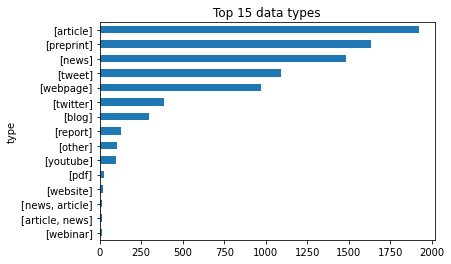

In [23]:
_ = total_anns_df[total_anns_df['is:'].str.len() > 0]['is:'].value_counts().head(15)
_.plot(kind='barh',title='Top 15 data types', ylabel='type').invert_yaxis()
plt.savefig('top_15_is.png')

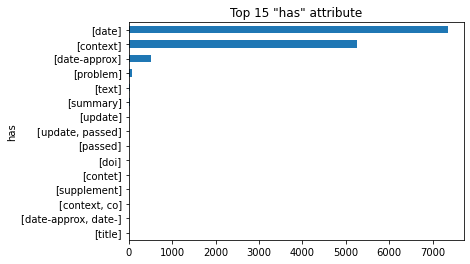

In [24]:
total_anns_df[total_anns_df['has:'].str.len() > 0]['has:'].value_counts().head(15).plot(kind='barh',
                                                                                      title='Top 15 "has" attribute',
                                                                                      ylabel='has').invert_yaxis()
plt.savefig('top_15_has.png')

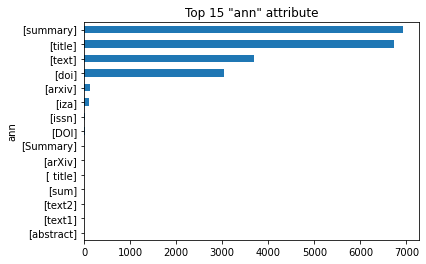

In [25]:
total_anns_df[total_anns_df['ann:'].str.len() > 0]['ann:'].value_counts().head(15).plot(kind='barh',
                                                                                      title='Top 15 "ann" attribute',
                                                                                      ylabel='ann').invert_yaxis()
plt.savefig('top_15_ann.png')

In [26]:
tag_terms_ = Counter(total_anns_df['terms_tags'].sum())
print(f"Unique tag_terms {len(tag_terms_)}")

Unique tag_terms 15909


In [27]:
tag_terms = dict(tag_terms_.most_common(150))
del tag_terms['COVID-19']
tag_terms

{'vaccine': 1835,
 'USA': 1012,
 'pandemic': 976,
 'UK': 916,
 'research': 795,
 'transmission': 724,
 'government': 696,
 'misinformation': 678,
 'policy': 666,
 'data': 658,
 'vaccination': 637,
 'public health': 577,
 'lockdown': 516,
 'infection': 498,
 'risk': 457,
 'science': 439,
 'variant': 428,
 'mental health': 424,
 'mortality': 418,
 'social distancing': 412,
 'epidemiology': 391,
 'health': 374,
 'behavioral science': 358,
 'hospitalization': 355,
 'modeling': 353,
 'psychology': 349,
 'social media': 337,
 'testing': 336,
 'children': 317,
 'response': 315,
 'protection': 301,
 'economy': 293,
 'intervention': 288,
 'strategy': 286,
 'communication': 255,
 'Omicron': 255,
 'healthcare': 239,
 'immunity': 237,
 'survey': 215,
 'WHO': 214,
 'death': 213,
 'prediction': 210,
 'prevention': 206,
 'England': 198,
 'behavior': 197,
 'safety': 195,
 'education': 192,
 'effectiveness': 192,
 'anxiety': 185,
 'stress': 178,
 'treatment': 167,
 'face mask': 166,
 'global': 165,
 's

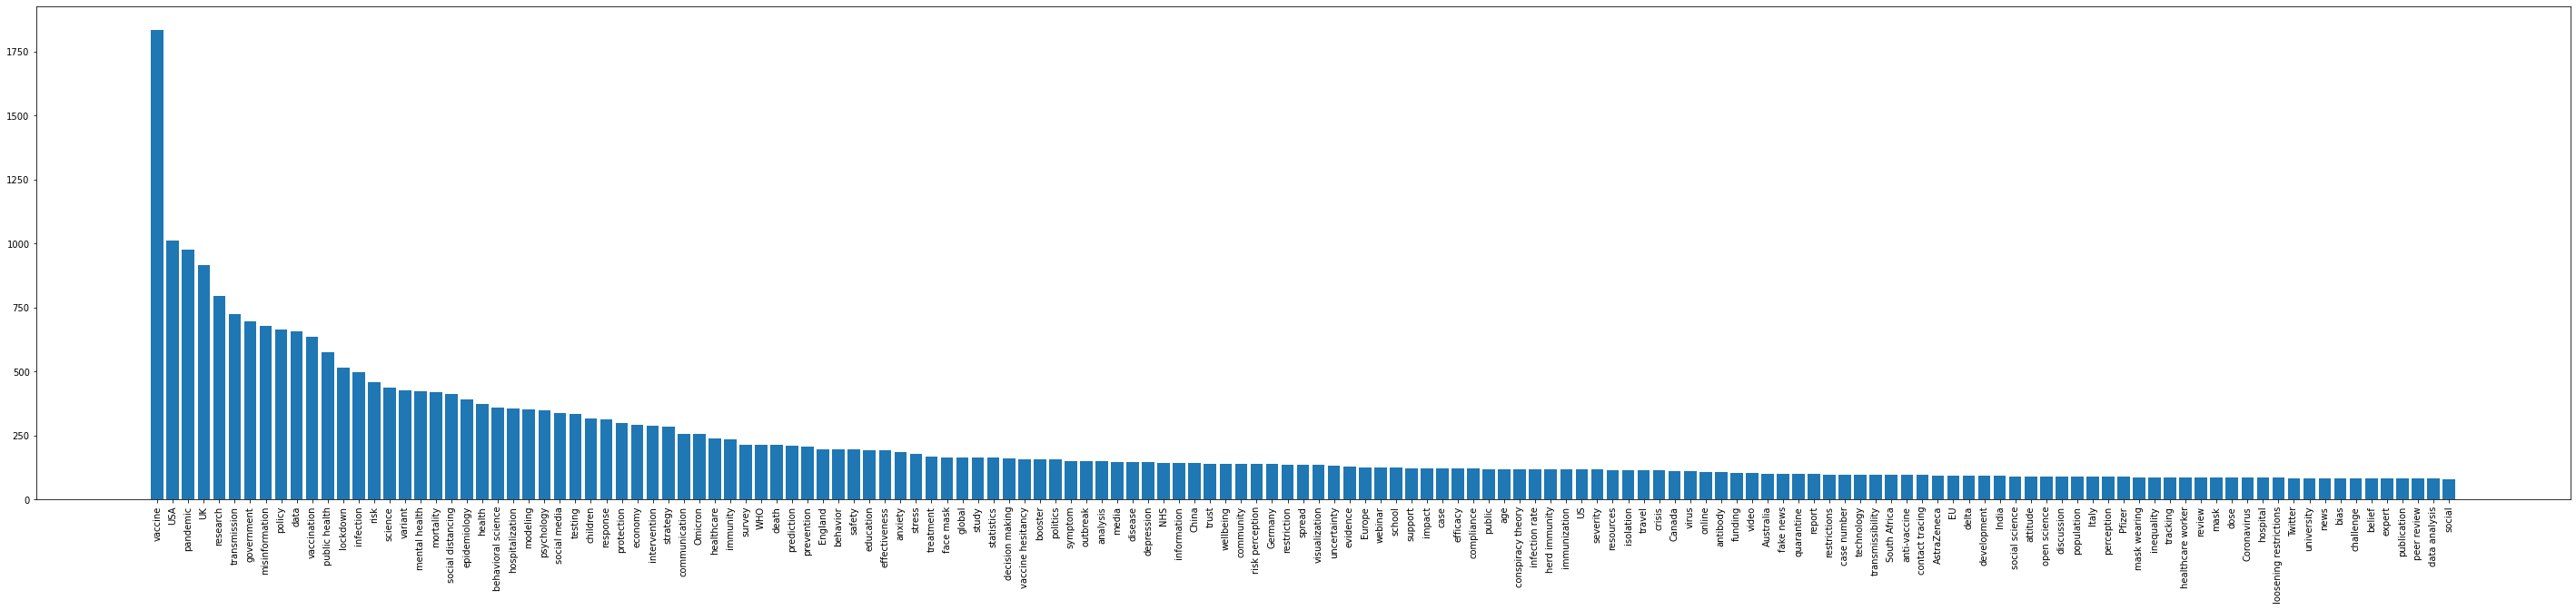

In [28]:
plt.figure(figsize=(50, 10))
plt.bar(list(tag_terms.keys()), list(tag_terms.values()))
plt.xticks(rotation=90)
plt.savefig('top_term_tags.png')